In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize

In [7]:
data = pd.read_csv('dataset_35_dermatology.csv')
data.head()
data = data.replace("?", np.NaN)
data.fillna(data.astype(float).mean(), inplace=True)

In [8]:
data = data.iloc[:, 1:]
data.shape

(366, 34)

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [10]:
data_x = data.iloc[:, :-1]
#print (data_x)
data_y = data.iloc[:, -1]
#qwerty = normalize(data_x, norm='l2', axis=1, copy=True, return_norm=False)

qwerty = pd.DataFrame(MinMaxScaler().fit_transform(data_x)) 
qwq = qwerty.copy()
print (qwerty)

           0         1         2         3         4         5         6   \
0    0.666667  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
1    1.000000  1.000000  0.666667  0.333333  0.000000  0.000000  0.000000   
2    0.333333  0.666667  1.000000  0.333333  1.000000  0.000000  1.000000   
3    0.666667  0.666667  0.000000  0.000000  0.000000  0.000000  0.000000   
4    1.000000  0.666667  0.666667  0.666667  0.666667  0.000000  0.666667   
5    1.000000  0.666667  0.000000  0.000000  0.000000  0.000000  0.000000   
6    0.333333  0.000000  0.666667  0.000000  0.000000  0.000000  0.000000   
7    0.666667  1.000000  1.000000  1.000000  1.000000  0.000000  0.666667   
8    0.666667  0.333333  0.000000  0.666667  0.000000  0.000000  0.000000   
9    0.666667  0.333333  0.000000  0.333333  0.000000  0.000000  0.000000   
10   1.000000  0.666667  0.333333  0.333333  0.000000  0.000000  0.000000   
11   0.666667  0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
data_x.head()

,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
0,2,0,3,0,0,0,0,1,0,0,...,0,0,0,3,0,0,0,1,0,55
1,3,3,2,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,8
2,1,2,3,1,3,0,3,0,0,0,...,2,0,2,3,2,0,0,2,3,26
3,2,2,0,0,0,0,0,3,2,0,...,0,3,0,0,0,0,0,3,0,40
4,3,2,2,2,2,0,2,0,0,0,...,2,2,3,2,3,0,0,2,3,45


In [12]:
data_y.head()


0    2
1    1
2    3
3    1
4    3
Name: class, dtype: int64

In [13]:
dist = ["euclidean", "cityblock", "chebyshev"]
kernel = ['uniform', 'triangular', 'epanechnikov', 'quartic', 'triweight', 'tricube', 'gaussian', 'cosine', 'logistic', 'sigmoid']
ks = []
for i in range(1, 10):
    ks.append(i)


In [14]:
from sklearn.metrics import f1_score
from scipy.spatial import distance


In [15]:
def euclidean(x, y):
    res = 0.0
    for a, b in zip(x, y):
        res = res + (a - b) ** 2
    return math.sqrt(res)
  
def chebyshev(x, y):
    return abs(max(map(sub, x, y), key=abs))
 
def manhattan(x, y):
    return sum(map(abs, map(sub, x, y)))


def uniform(x):
    if abs(x) >= 1:
        return 0
    else:
        return 0.5


def triangular(x):
    if abs(x) >= 1:
        return 0
    else:
        return 1 - abs(x)


def epanechnikov(x):
    if abs(x) >= 1:
        return 0
    else:
        return 0.75 * (1 - x ** 2)


def quartic(x):
    if abs(x) >= 1:
        return 0
    else:
        return 15 / 16 * (1 - x ** 2) ** 2
from sklearn.neighbors import KNeighborsClassifier

def triweight(x):
    if abs(x) >= 1:
        return 0
    else:
        return 35 / 32 * (1 - x ** 2) ** 3


def tricube(x):
    if abs(x) >= 1:
        return 0
    else:
        return 70 / 81 * (1 - abs(x) ** 3) ** 3


def gaussian(x):
    return 1 / np.sqrt(np.pi * 2) * np.exp((-0.5) * x ** 2)


def cosine(x):
    if abs(x) >= 1:
        return 0
    else:
        return np.pi / 4 * np.cos(np.pi / 2 * x)


def logistic(x):
    return 1 / (np.e ** x + 2 + np.e ** (-x))


def sigmoid(x):
    return 2 / np.pi / (np.e ** x + np.e ** (-x))



In [16]:
def get_func(name):
    return globals()[name]

def type_knn(type, dists, k):
    if type == 'fixed':
        return k
    return dists[dists.argsort()[k]]

def kernel_f(name):
    return get_func(name)

class KNN:

    def __init__(self, k, kernel, distance, type):
        self.k = k
        self.kernel = kernel_f(kernel)
        self.distance = distance
        self.type = type

    def fit(self, X, y):
        self.train_X = X
        self.train_y = y

    def predict(self, qq):

        dists = distance.cdist(self.train_X, [qq], metric=self.distance).reshape((-1,))
        h = type_knn(type, dists, self.k)
        dists /= h
        f = lambda arr: sum(map(self.kernel, arr)) 
        ans = np.zeros((6,))
        for i in range(6):
            d = dists[self.train_y == i]
            #print (d)
            ans[i] = f(d)
        return ans.argmax() 


In [19]:
anss = []
params = []
dddots = []
ansparams = []
best_of_the_best_f = 0.0

for d in dist:
    for ker in kernel:
        dots = []
        cur_f = 0.0
        h = 1
        while h < 20:
            print('h = %s, %s, %s' % (h, d, ker))
            q = []
            for i in range(len(qwerty)):
                train_x = qwerty.drop(i)
                train_y = data_y.drop(i)
                test_x = qwerty.iloc[i]
                test_y = data_y.iloc[i]
                model = KNN(h, ker, d, 'var')
                model.fit(train_x, train_y)
                q.append(model.predict(test_x))
            #print(q)
            anss.append(q)
            f1_micro = f1_score(data_y, q, average='micro')
            dots.append((f1_micro, h))
            if f1_micro > cur_f:
                cur_f = f1_micro
                params.append((cur_f, h, d, ker))
            h += 1
        #best_dots = sorted(dots, key=lambda x: x[0])
        if cur_f > best_of_the_best_f:
            best_of_the_best_f = cur_f
            dddots.append(dots)
            sorted_params = sorted(params, key=lambda x: x[0])
            ansparams.append(sorted_params[-1])

h = 1, euclidean, uniform
h = 2, euclidean, uniform
h = 3, euclidean, uniform
h = 4, euclidean, uniform
h = 5, euclidean, uniform
h = 6, euclidean, uniform
h = 7, euclidean, uniform
h = 8, euclidean, uniform
h = 9, euclidean, uniform
h = 10, euclidean, uniform
h = 11, euclidean, uniform
h = 12, euclidean, uniform
h = 13, euclidean, uniform
h = 14, euclidean, uniform
h = 15, euclidean, uniform
h = 16, euclidean, uniform
h = 17, euclidean, uniform
h = 18, euclidean, uniform
h = 19, euclidean, uniform
h = 1, euclidean, triangular
h = 2, euclidean, triangular
h = 3, euclidean, triangular
h = 4, euclidean, triangular
h = 5, euclidean, triangular
h = 6, euclidean, triangular
h = 7, euclidean, triangular
h = 8, euclidean, triangular
h = 9, euclidean, triangular
h = 10, euclidean, triangular
h = 11, euclidean, triangular
h = 12, euclidean, triangular
h = 13, euclidean, triangular
h = 14, euclidean, triangular
h = 15, euclidean, triangular
h = 16, euclidean, triangular
h = 17, euclidean, triang

h = 10, cityblock, tricube
h = 11, cityblock, tricube
h = 12, cityblock, tricube
h = 13, cityblock, tricube
h = 14, cityblock, tricube
h = 15, cityblock, tricube
h = 16, cityblock, tricube
h = 17, cityblock, tricube
h = 18, cityblock, tricube
h = 19, cityblock, tricube
h = 1, cityblock, gaussian
h = 2, cityblock, gaussian
h = 3, cityblock, gaussian
h = 4, cityblock, gaussian
h = 5, cityblock, gaussian
h = 6, cityblock, gaussian
h = 7, cityblock, gaussian
h = 8, cityblock, gaussian
h = 9, cityblock, gaussian
h = 10, cityblock, gaussian
h = 11, cityblock, gaussian
h = 12, cityblock, gaussian
h = 13, cityblock, gaussian
h = 14, cityblock, gaussian
h = 15, cityblock, gaussian
h = 16, cityblock, gaussian
h = 17, cityblock, gaussian
h = 18, cityblock, gaussian
h = 19, cityblock, gaussian
h = 1, cityblock, cosine
h = 2, cityblock, cosine
h = 3, cityblock, cosine
h = 4, cityblock, cosine
h = 5, cityblock, cosine
h = 6, cityblock, cosine
h = 7, cityblock, cosine
h = 8, cityblock, cosine
h = 9, 

In [20]:
print (best_of_the_best_f)
print (dddots[-1])
print (ansparams)

0.9289617486338798
[(0.9153005464480873, 1), (0.9234972677595629, 2), (0.9207650273224044, 3), (0.9234972677595629, 4), (0.9234972677595629, 5), (0.9262295081967213, 6), (0.9262295081967213, 7), (0.9262295081967213, 8), (0.9262295081967213, 9), (0.9289617486338798, 10), (0.9289617486338798, 11), (0.9262295081967213, 12), (0.9234972677595629, 13), (0.9234972677595629, 14), (0.9234972677595629, 15), (0.9207650273224044, 16), (0.9207650273224044, 17), (0.9207650273224044, 18), (0.9207650273224044, 19)]
[(0.9180327868852459, 4, 'euclidean', 'uniform'), (0.9207650273224044, 11, 'euclidean', 'triangular'), (0.9262295081967213, 4, 'cityblock', 'triangular'), (0.9289617486338798, 10, 'cityblock', 'quartic')]


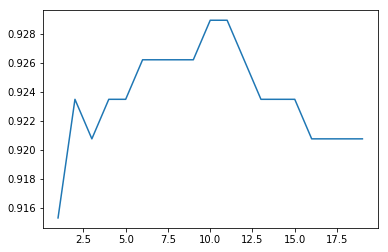

In [21]:
xx = []
yy = []
h = 1
while h < 20:
    q = []
    for i in range(len(qwerty)):
        train_x = qwerty.drop(i)
        train_y = data_y.drop(i)
        test_x = qwerty.iloc[i]
        test_y = data_y.iloc[i]
        model = KNN(h, 'quartic', 'cityblock', 'var')
        model.fit(train_x, train_y)
        q.append(model.predict(test_x))
#    anss.append(q)
    f1_micro = f1_score(data_y, q, average='micro')
    xx.append(h)
    yy.append(f1_micro)
    h += 1
    #print (q)
#for (i, j) in dddots[-1]:
#    yy.append(i)
#    xx.append(j)
fig, ax = plt.subplots()
ax.plot(xx, yy)

In [34]:
www = sorted(zip(xx, yy), key=lambda x: x[1])
print (www[-1])

(0.10999999999999999, 0.45695364238410596)


In [230]:
anss = []
params = []
dddots = []
ansparams = []
best_of_the_best_f = 0.0

hs = []
for i in range(1, 10):
    hs.append(i)

for d in dist:
    for ker in kernel:
        dots = []
        cur_f = 0.0
        for h in hs:
            if h == 1:
                print('h = %s, %s, %s' % (h, d, ker))
            q = []
            for i in range(len(qwerty)):
                train_x = qwerty.drop(i)
                train_y = data_y.drop(i)
                test_x = qwerty.iloc[i]
                test_y = data_y.iloc[i]
                model = knn.KNN(h, ker, d, 'fixed')
                model.fit(train_x, train_y)
                q.append(model.predict(test_x))
            #print(q)
            anss.append(q)
            f1_micro = f1_score(data_y, q, average='micro')
            dots.append((f1_micro, k))
            if f1_micro > cur_f:
                cur_f = f1_micro
                params.append((cur_f, k, d, ker))
        #best_dots = sorted(dots, key=lambda x: x[0])
        if cur_f > best_of_the_best_f:
            best_of_the_best_f = cur_f
            dddots.append(dots)
            sorted_params = sorted(params, key=lambda x: x[0])
            ansparams.append(sorted_params[-1])

h = 1, euclidean, uniform
h = 1, euclidean, triangular
h = 1, euclidean, epanechnikov
h = 1, euclidean, quartic
h = 1, euclidean, triweight
h = 1, euclidean, tricube
h = 1, euclidean, gaussian
h = 1, euclidean, cosine
h = 1, euclidean, logistic
h = 1, euclidean, sigmoid
h = 1, cityblock, uniform
h = 1, cityblock, triangular
h = 1, cityblock, epanechnikov
h = 1, cityblock, quartic
h = 1, cityblock, triweight
h = 1, cityblock, tricube
h = 1, cityblock, gaussian
h = 1, cityblock, cosine
h = 1, cityblock, logistic
h = 1, cityblock, sigmoid
h = 1, chebyshev, uniform
h = 1, chebyshev, triangular
h = 1, chebyshev, epanechnikov
h = 1, chebyshev, quartic
h = 1, chebyshev, triweight
h = 1, chebyshev, tricube
h = 1, chebyshev, gaussian
h = 1, chebyshev, cosine
h = 1, chebyshev, logistic
h = 1, chebyshev, sigmoid


In [231]:
print (best_of_the_best_f)
print (dddots[-1])
print (ansparams[-1])

0.6688741721854304
[(0.6026490066225165, 39), (0.6688741721854304, 39), (0.6490066225165563, 39), (0.6357615894039735, 39), (0.6225165562913907, 39), (0.6026490066225165, 39), (0.5960264900662252, 39), (0.5695364238410596, 39), (0.5562913907284768, 39)]
(0.6688741721854304, 39, 'cityblock', 'triangular')


In [237]:
xx = []
yy = []

h = 0.1
while h < 10.0:
    q = []
    for i in range(len(qwerty)):
        train_x = qwerty.drop(i)
        train_y = data_y.drop(i)
        test_x = qwerty.iloc[i]
        test_y = data_y.iloc[i]
        model = knn.KNN(h, 'triangular', 'cityblock', 'fixed')
        model.fit(train_x, train_y)
        q.append(model.predict(test_x))
#    anss.append(q)
    f1_micro = f1_score(data_y, q, average='micro')
    xx.append(h)
    yy.append(f1_micro)
    h += 0.1
    
fig, ax = plt.subplots()
ax.plot(xx, yy)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices